In [1]:
# Packages
import gene_model
import gfs
import color_scheme
import simulator

from matplotlib import pyplot as plt
import seaborn as sns

import sbi
import numpy as np
import multiprocessing
import time

import torch

from sbi.analysis import pairplot
from sbi.inference import NPE
from sbi.utils import BoxUniform
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

from concurrent.futures import ProcessPoolExecutor, as_completed


# Simulation Parameters

hgt_rate_max = 0.5 # Maximum hgt rate
hgt_rate_min = 0 # Minimum hgt rate
    

prior = BoxUniform(low=hgt_rate_min * torch.ones(1), high=hgt_rate_max * torch.ones(1))

In [6]:
# Simulation Parameters
theta = 5 # Gene Gain rate
rho = 0.2 # Gene Loss rate

gene_conv = 0 # Gene Conversion rate
recomb = 0 # Recombination rate

num_sites = 100 # Number of sites to simulate
num_samples = 5 # Number of samples / individuals

hgt_rates = np.linspace(0, 2, 21)  # Werte von 0.1 bis 2 in 20 Schritten

# Ergebnisse speichern
execution_times = []

# Simulation für verschiedene hgt_rate-Werte

# num_sites hoch
for rate in hgt_rates:
    start_time = time.time()  # Startzeit

    for i in range(1,10+1):
        mts = gene_model.gene_model(
            theta=0,
            rho=0,
            gene_conversion_rate=0,
            recombination_rate=0,
            hgt_rate=rate,
            num_samples=num_samples,
            num_sites=num_sites,
            double_site_relocation=False, # Fix double gene gain events, won't hide the warning.
        )
    
    end_time = time.time()  # Endzeit
    
    # Ausführungszeit berechnen
    execution_times.append((end_time - start_time)/10)



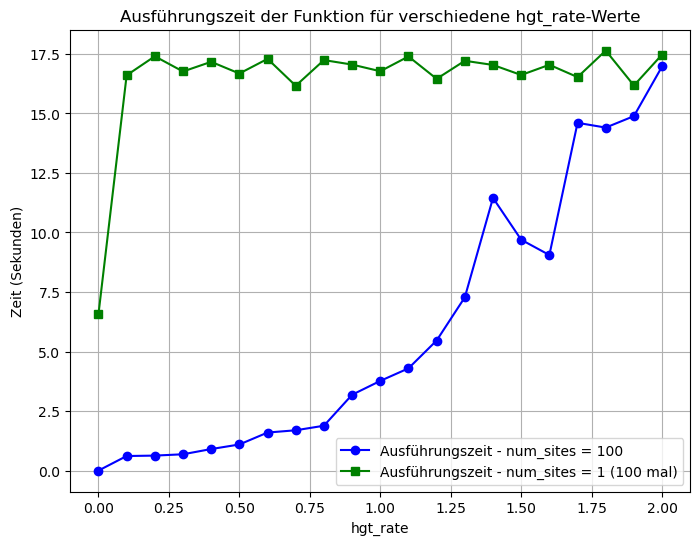

In [7]:
from multiprocessing import Pool

execution_times_site = []
# Alle sites einzeln
for rate in hgt_rates:
    
    start_time = time.time()  # Startzeit

    with Pool() as pool:
        # Ungeordnete Verarbeitung
        results = pool.imap_unordered(simulator.simulate_site, np.ones(num_sites) * rate)
        results_list = list(results)
    
    end_time = time.time()  # Endzeit
    
    # Ausführungszeit berechnen
    execution_times_site.append(end_time - start_time)


# Plot der Ergebnisse
plt.figure(figsize=(8, 6))
plt.plot(hgt_rates, execution_times, marker="o", label="Ausführungszeit - num_sites = 100", color="blue")
plt.plot(hgt_rates, execution_times_site, marker="s", label="Ausführungszeit - num_sites = 1 (100 mal)", color="green")
plt.xlabel("hgt_rate")
plt.ylabel("Zeit (Sekunden)")
plt.title("Ausführungszeit der Funktion für verschiedene hgt_rate-Werte")
plt.grid(True)
plt.legend()
plt.show()

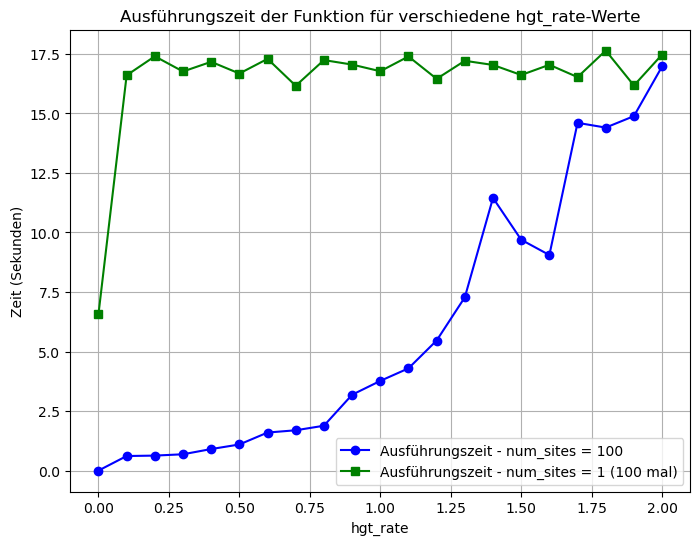

In [8]:
# Plot der Ergebnisse
plt.figure(figsize=(8, 6))
plt.plot(hgt_rates, execution_times, marker="o", label="Ausführungszeit - num_sites = 100", color="blue")
plt.plot(hgt_rates, execution_times_site, marker="s", label="Ausführungszeit - num_sites = 1 (100 mal)", color="green")
plt.xlabel("hgt_rate")
plt.ylabel("Zeit (Sekunden)")
plt.title("Ausführungszeit der Funktion für verschiedene hgt_rate-Werte")
plt.grid(True)
plt.legend()
plt.show()